# KNN Algorithm

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

## Data Preprocess

Step 1: Split X and y

In [2]:
def splits_X_y(df):
    X = df[df.columns[1:]]
    y = df[df.columns[:1]]
    return X, y

Step 2: Split Test and Train

In [3]:
def split_Test_Train(df):
    X, y = splits_X_y(df)
    return train_test_split(X, y, test_size=0.25, random_state=42)

Step 3: Apply scalling with MinMaxscaller

In [4]:
def Scaller(Train,Test):
    MinMaxScaler = preprocessing.MinMaxScaler()
    Scalled_Train_data = MinMaxScaler.fit_transform(Train)
    Scalled_val_data = MinMaxScaler.transform(Test)
    return Scalled_Train_data,Scalled_val_data

Step 4: Fill missing values

In [5]:
def missing_values_handler(X_train,X_test):
    imputer = KNNImputer(missing_values=np.nan,n_neighbors=3)
    X_train = imputer.fit_transform(X_train)
    X_test = imputer.transform(X_test)
    return X_train,X_test

Step 5: Merge above functions

In [6]:
def data_preprocess(df,columns,handle_missing_values):
    df=titanic[columns]
    X_train,X_test,y_train,y_test =  split_Test_Train(df)
    X_train,X_test = Scaller(X_train,X_test)
    
    if handle_missing_values:
        X_train,X_test=missing_values_handler(X_train,X_test)
        
    return X_train,X_test,y_train,y_test

## Model Evaluation

Step 1: Make the neccesary experiments and save the results in a dictionary

In [7]:
def evaluate(X_train,X_test,y_train,y_test,weights,p_ls,dict_keys):
    dict_list = []
    for p in p_ls:
        for weight in weights:
            accuracy_score = []
            recall_score = []
            precision_score = []
            f1_score = []
            for n_neighbors in range (1,201):
                model=KNeighborsClassifier(n_neighbors=n_neighbors, weights=weight, p=p, metric='minkowski', n_jobs=-1)
                model.fit(X_train, y_train.values.ravel())
                y_predicted = model.predict(X_test)
                accuracy_score.append(metrics.accuracy_score(y_test, y_predicted))
                recall_score.append(metrics.recall_score(y_test, y_predicted))
                precision_score.append(metrics.precision_score(y_test, y_predicted))
                f1_score.append(metrics.f1_score(y_test, y_predicted))
            
            # f takes create a dict setting as key the name (string) of the variable while
            # setting as values the values of the varible.
            f = lambda s: f"dict({ ','.join( f'{k}={k}' for k in s.split(',') ) })"
            metrics_dict = eval(f(dict_keys))
            dict_list.append(metrics_dict)
    return dict_list

Step 2: Use the dictionary with the metrics resulsts in order to find the best value of n_estimatorts hyperparameter according the F1 score.

In [8]:
def get_best_neighbor(metrics_dict):
    for i in range (0,len(metrics_dict)):
        min_f1 = max(metrics_dict[i]['f1_score'])
        min_index = metrics_dict[i]['f1_score'].index(min_f1)
        accuracy_score = metrics_dict[i]['accuracy_score'][min_index]
        recall_score = metrics_dict[i]['recall_score'][min_index]
        precision_score = metrics_dict[i]['precision_score'][min_index]
        f1_score = metrics_dict[i]['f1_score'][min_index]
        p = metrics_dict[i]['p']
        weight = metrics_dict[i]['weight']
        print ('\n Experiment : ',i+1)
        print ('\n weihts = ', weight, 
               '\n p =', p, 
               '\n n_neighbors =', min_index+1,
               '\n accuracy_score = ',  accuracy_score, 
               '\n recall_score = ', recall_score, 
               '\n precision_score = ', precision_score, 
               '\n f1_score = ', f1_score)

Step 3: Train a model and evaluate with the test set using F1-Score.

In [9]:
def evaluate_missing_values_handler(X_train,X_test,y_train,y_test):
    f1_score = []
    for n_neighbors in range (1,201):
        model=KNeighborsClassifier(n_neighbors=n_neighbors, weights='uniform', p=1, metric='minkowski', n_jobs=-1)
        model.fit(X_train, y_train.values.ravel())
        y_predicted = model.predict(X_test)
        f1_score.append(metrics.f1_score(y_test, y_predicted))
    return f1_score 

Step 4: Plot 2 lists that describe the change of F1-Score

In [10]:
def get_plot(f1_handler,f1_no_handler):
    plt.plot(range(1, len(f1_handler) + 1), f1_handler,label='F1-Score with KNNImputer')
    plt.plot(range(1, len(f1_no_handler) + 1), f1_no_handler,label='F1-Score without KNNImputer')
    plt.title('KNNImputer influence on F1-Score')
    plt.xlabel('Number of Neighbors')
    plt.ylabel('F1')
    plt.legend()
    plt.savefig('F1_plot.pdf')
    plt.show()

## Define necessary variables

In [11]:
exlude_missing_values = ['Survived', 'Pclass', 'SibSp', 'Parch', 'Fare']
used_colums =['Survived', 'Pclass','Age', 'SibSp', 'Parch', 'Fare']
weights=['uniform','distance']
p_ls=[1,2,3]
dict_keys='weight,p,accuracy_score,recall_score,precision_score,f1_score'

titanic = pd.read_csv('titanic.csv',low_memory=False,sep=',')

## Evaluate using possible hyper-parameters

In [12]:
X_train,X_test,y_train,y_test=data_preprocess(titanic,used_colums,handle_missing_values=True)
metrics_dict = evaluate(X_train,X_test,y_train,y_test,weights,p_ls,dict_keys)
get_best_neighbor(metrics_dict)


 Experiment :  1

 weihts =  uniform 
 p = 1 
 n_neighbors = 75 
 accuracy_score =  0.7668161434977578 
 recall_score =  0.550561797752809 
 precision_score =  0.8032786885245902 
 f1_score =  0.6533333333333333

 Experiment :  2

 weihts =  distance 
 p = 1 
 n_neighbors = 127 
 accuracy_score =  0.7130044843049327 
 recall_score =  0.5842696629213483 
 precision_score =  0.6582278481012658 
 f1_score =  0.619047619047619

 Experiment :  3

 weihts =  uniform 
 p = 2 
 n_neighbors = 124 
 accuracy_score =  0.7399103139013453 
 recall_score =  0.5842696629213483 
 precision_score =  0.7123287671232876 
 f1_score =  0.6419753086419753

 Experiment :  4

 weihts =  distance 
 p = 2 
 n_neighbors = 123 
 accuracy_score =  0.7130044843049327 
 recall_score =  0.5842696629213483 
 precision_score =  0.6582278481012658 
 f1_score =  0.619047619047619

 Experiment :  5

 weihts =  uniform 
 p = 3 
 n_neighbors = 116 
 accuracy_score =  0.7354260089686099 
 recall_score =  0.5842696629213483 

## Evalate the proces of KNNImputer.

Step 1: Train and test a model without using features with missing values.
    
Step 2: Train and test a model using features with missing values that have replaced with a KNNInputer model

Stel 3:  Plot the F1-Score on both cases.

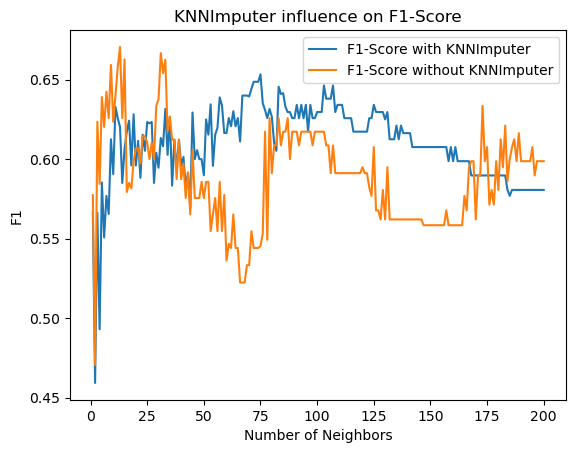

In [13]:
X_train,X_test,y_train,y_test=data_preprocess(titanic,used_colums,handle_missing_values=True)
f1_handler = evaluate_missing_values_handler(X_train,X_test,y_train,y_test)
X_train,X_test,y_train,y_test=data_preprocess(titanic,exlude_missing_values,handle_missing_values=False)
f1_no_handler = evaluate_missing_values_handler(X_train,X_test,y_train,y_test)
get_plot(f1_handler,f1_no_handler)